# What your education and major means for your job placement.

Today we have with us data from a survey conducted by StackOverflow. Almost 51000 stackoverflow users participated in this survey answering many questions. And based on their answer I am going to try to answer some questions running in my own head.

But first lets load the data in our program and see what we got here.

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('./survey_results_public.csv')
df.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,...,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,...,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,...,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A professional degree,White or of European descent,Somewhat agree,Agree,Disagree,Agree,113750.0,NaN
3,4,Professional non-developer who sometimes write...,"Yes, both",United States,No,Employed full-time,Doctoral degree,A non-computer-focused engineering discipline,"Less than half the time, but at least one day ...","10,000 or more employees",...,Disagree,Male,A doctoral degree,White or of European descent,Agree,Agree,Somewhat agree,Strongly agree,NaN,NaN
4,5,Professional developer,"Yes, I program as a hobby",Switzerland,No,Employed full-time,Master's degree,Computer science or software engineering,Never,10 to 19 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df.columns.tolist()

['Respondent',
 'Professional',
 'ProgramHobby',
 'Country',
 'University',
 'EmploymentStatus',
 'FormalEducation',
 'MajorUndergrad',
 'HomeRemote',
 'CompanySize',
 'CompanyType',
 'YearsProgram',
 'YearsCodedJob',
 'YearsCodedJobPast',
 'DeveloperType',
 'WebDeveloperType',
 'MobileDeveloperType',
 'NonDeveloperType',
 'CareerSatisfaction',
 'JobSatisfaction',
 'ExCoderReturn',
 'ExCoderNotForMe',
 'ExCoderBalance',
 'ExCoder10Years',
 'ExCoderBelonged',
 'ExCoderSkills',
 'ExCoderWillNotCode',
 'ExCoderActive',
 'PronounceGIF',
 'ProblemSolving',
 'BuildingThings',
 'LearningNewTech',
 'BoringDetails',
 'JobSecurity',
 'DiversityImportant',
 'AnnoyingUI',
 'FriendsDevelopers',
 'RightWrongWay',
 'UnderstandComputers',
 'SeriousWork',
 'InvestTimeTools',
 'WorkPayCare',
 'KinshipDevelopers',
 'ChallengeMyself',
 'CompetePeers',
 'ChangeWorld',
 'JobSeekingStatus',
 'HoursPerWeek',
 'LastNewJob',
 'AssessJobIndustry',
 'AssessJobRole',
 'AssessJobExp',
 'AssessJobDept',
 'AssessJobT

## Where do people with different education levels ends up?

There are a many interesting data points in this data but I'm most interested in is the FormalEducation since I want to know how does your education level reflect on your career and what kind of company you will end up in. So, lets look around the data in this column

In [158]:
df['FormalEducation'].unique()

array(['Secondary school',
       "Some college/university study without earning a bachelor's degree",
       "Bachelor's degree", 'Doctoral degree', "Master's degree",
       'Professional degree', 'Primary/elementary school',
       'I prefer not to answer', 'I never completed any formal education'],
      dtype=object)

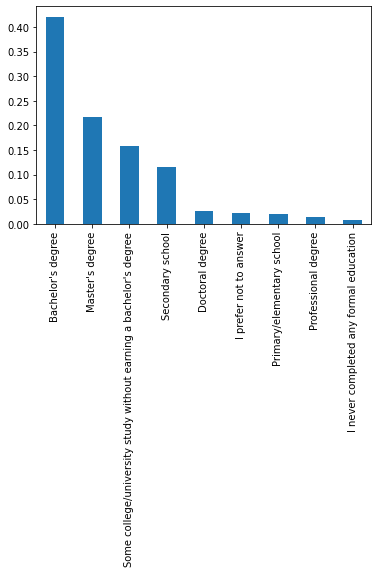

In [159]:
professionals = df.FormalEducation.value_counts()

(professionals/df.shape[0]).plot(kind="bar");

Clearly we got a lot of people with minimum college level education. lets separate this data with companysize and see where these people are working right now.

In [160]:
education_df = df[['FormalEducation', 'CompanySize']]

In [161]:
education_group_df = education_df.groupby(['FormalEducation','CompanySize']).size().unstack()
education_group_df

CompanySize,"1,000 to 4,999 employees",10 to 19 employees,"10,000 or more employees",100 to 499 employees,20 to 99 employees,"5,000 to 9,999 employees",500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer
FormalEducation,,,,,,,,,,
Bachelor's degree,1732,1936,2804,3509,4030,772,1199,1559,359,291
Doctoral degree,167,74,240,173,168,74,75,85,38,15
I never completed any formal education,15,36,18,36,45,7,14,51,6,11
I prefer not to answer,33,52,22,54,81,10,23,37,16,36
Master's degree,1079,776,1574,1837,1999,440,653,756,192,163
Primary/elementary school,15,33,17,40,55,4,4,48,15,6
Professional degree,58,68,67,107,120,24,44,52,9,10
Secondary school,219,379,296,470,655,81,139,456,95,68
Some college/university study without earning a bachelor's degree,513,749,642,1048,1434,192,335,763,139,81


we can see what number of each education level is placed in what size of company let see this visually to get some more clearity

<AxesSubplot:xlabel='FormalEducation'>

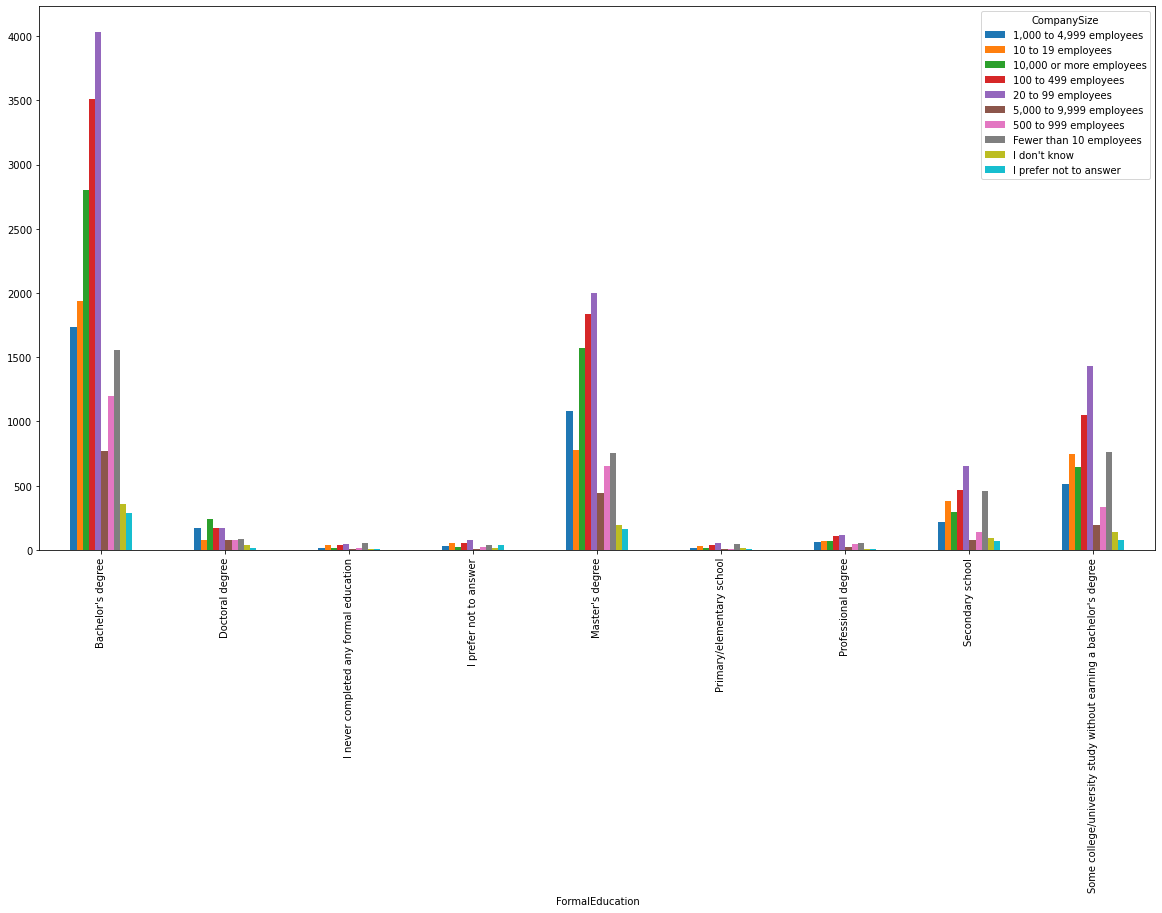

In [162]:
education_group_df.plot(kind='bar', figsize=(20,10))

Well, that isn't much clear, is it?
so lets do his again but instead of exact count lets see what percentage of each education level ends up in each company size

In [141]:
education_group_df = education_df.groupby(['FormalEducation','CompanySize']).size().unstack()
education_group_df = education_group_df.div(education_group_df.sum(1), 0)
education_group_df

CompanySize,"1,000 to 4,999 employees",10 to 19 employees,"10,000 or more employees",100 to 499 employees,20 to 99 employees,"5,000 to 9,999 employees",500 to 999 employees,Fewer than 10 employees,I don't know,I prefer not to answer
FormalEducation,,,,,,,,,,
Bachelor's degree,0.095212,0.106426,0.154142,0.192898,0.221538,0.042439,0.065912,0.085702,0.019735,0.015997
Doctoral degree,0.150586,0.066727,0.216411,0.155996,0.151488,0.066727,0.067628,0.076646,0.034265,0.013526
I never completed any formal education,0.062762,0.150628,0.075314,0.150628,0.188285,0.029289,0.058577,0.213389,0.025105,0.046025
I prefer not to answer,0.090659,0.142857,0.060440,0.148352,0.222527,0.027473,0.063187,0.101648,0.043956,0.098901
Master's degree,0.113951,0.081952,0.166227,0.194001,0.211110,0.046467,0.068962,0.079839,0.020277,0.017214
Primary/elementary school,0.063291,0.139241,0.071730,0.168776,0.232068,0.016878,0.016878,0.202532,0.063291,0.025316
Professional degree,0.103757,0.121646,0.119857,0.191413,0.214669,0.042934,0.078712,0.093023,0.016100,0.017889
Secondary school,0.076627,0.132610,0.103569,0.164451,0.229181,0.028341,0.048635,0.159552,0.033240,0.023793
Some college/university study without earning a bachelor's degree,0.087008,0.127035,0.108887,0.177748,0.243216,0.032564,0.056818,0.129410,0.023575,0.013738


<AxesSubplot:xlabel='FormalEducation'>

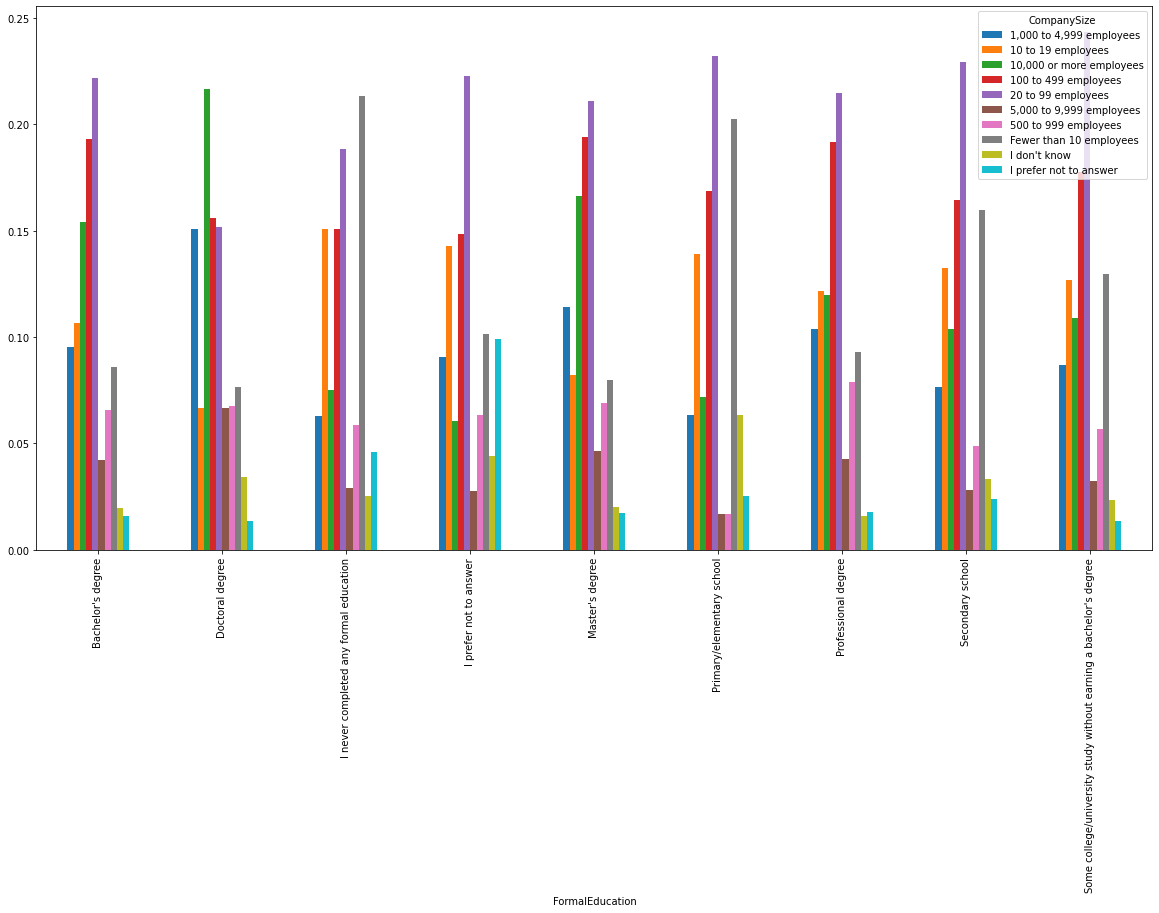

In [142]:
education_group_df.plot(kind='bar', figsize=(20,10))

Its a lot clear now. From the graph above we can see a few things rights way. A higer percentage of people with college level and above ends up in large corporate companies compared to people with lower education level. and difference in promeinent as the education level increases. Moreover, you are more likely to end up in a small scale company or startup if you did not go to college or dropped out.

## What about your college major?

So we saw people getting into college or higher education mostly ended up in companies with 1000+ employees. but is going to college is all it takes or do you also need to a computer related major. For that we a column name `MajorUndergrad`. lets see what we got here

In [163]:
education_major_df = df[['MajorUndergrad','CompanySize']]
education_major_df['MajorUndergrad'].unique()

array([nan, 'Computer science or software engineering',
       'A non-computer-focused engineering discipline',
       'A social science', 'Mathematics or statistics',
       'Computer engineering or electrical/electronics engineering',
       'A natural science', 'A business discipline',
       'Computer programming or Web development',
       'Information technology, networking, or system administration',
       'I never declared a major', 'Something else',
       'Fine arts or performing arts', 'Management information systems',
       'A humanities discipline', 'Psychology', 'A health science'],
      dtype=object)

We got people who studied different things in college but lets just divide it into people who studied computer related degree and people who had a none college major

In [165]:
def is_major_computer(major):
    computer_majors = ['Computer science or software engineering', 'Computer engineering or electrical/electronics engineering', 'Computer programming or Web development', 'Information technology, networking, or system administration', 'Computer Major']
    return 'Computer Major' if major in computer_majors else 'Not a Computer Major'

education_major_df['MajorUndergrad'] = education_major_df['MajorUndergrad'].apply(lambda x: is_major_computer(x))
education_major_df.MajorUndergrad.unique().tolist()

['Not a Computer Major', 'Computer Major']

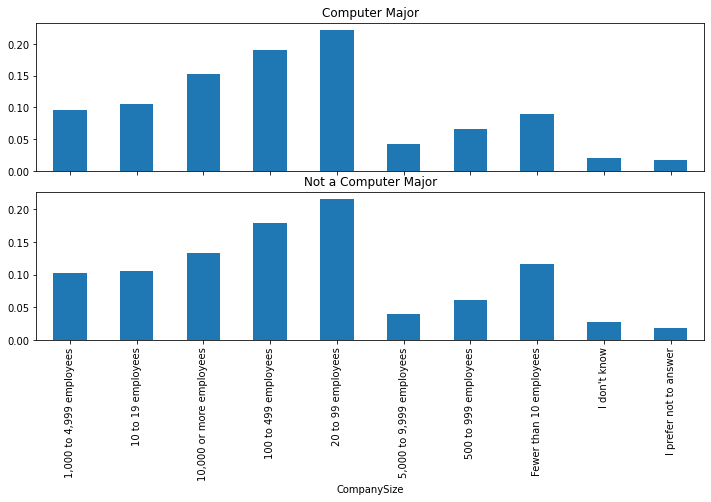

In [166]:
education_major_group_df = education_major_df.groupby(['MajorUndergrad', 'CompanySize']).size().reset_index(name='count')
education_major_group_df2 = education_major_group_df.groupby(['MajorUndergrad'])
fig, axes = plt.subplots(education_major_group_df2.ngroups,sharex=True, figsize=(10, 5))
fig.tight_layout()

for i, (MajorUndergrad, d) in enumerate(education_major_group_df2):
    d['count'] = d['count'].apply(lambda x: x/d['count'].sum())
    ax = d.plot.bar(x='CompanySize', y='count', ax=axes[i], title=MajorUndergrad)
    ax.get_legend().remove()

As we can see your college major really doesn't matter that much because similar percentage of people from both type of majors ends up in each category of company size. 

## But are people who came from a none computer science major happy at their jobs?

So you got into Computer related career leave your major in college behind. How satisfied are you with your decission? 

Luckily, we got some satisfaction fields in our data that we can use to see how satisfied people from other majors are in computer science career compared to people who planned to be here. lets clean these fields and see what we got here.

In [153]:
satisfaction_df = df[['MajorUndergrad','CareerSatisfaction', 'JobSatisfaction']]
satisfaction_df = satisfaction_df.dropna(subset=['MajorUndergrad'], how='any')
satisfaction_df= satisfaction_df.dropna(subset=['CareerSatisfaction', 'JobSatisfaction'], how='all')
satisfaction_df['MajorUndergrad'] = satisfaction_df['MajorUndergrad'].apply(lambda x: is_major_computer(x))

<AxesSubplot:>

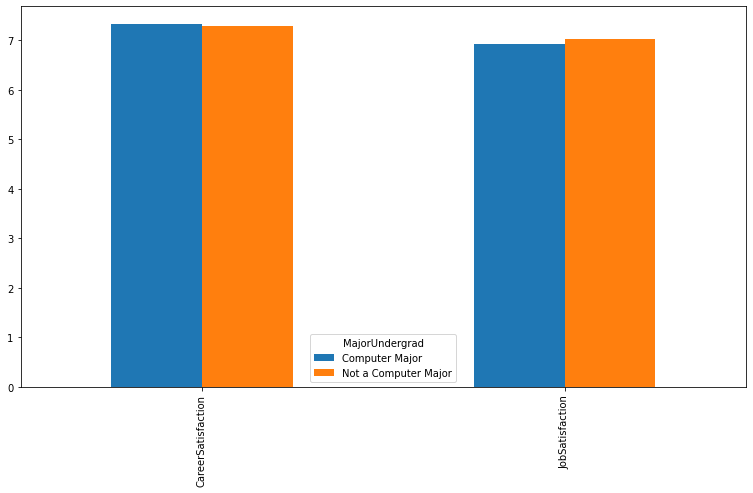

In [154]:
satisfaction_df.groupby(['MajorUndergrad']).mean().T.plot(kind='bar', figsize=(13,7))

This Graph shows that on average people from either major are happy in there career. Amazingily people who swtiched to this career are slightly more satisfied with there jobs. and why wouldnt they be Computer Science in awesome and we know it. :)